In [144]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve

In [320]:
dx=3e-3
L=30e-2
dL=10e-2
q=-2000
rho=2000
h=10
k=1
Cv=1000



## Conditions aux frontières et initiales
Ta=-10+273.15 ## Vérifier si c'est en celsius ou Kelvin
Ti= 20 +273.15

T0=np.ones(len(x_grid))*Ta  # Conditions initiales

# Dans la version temporelle, les conditions doivent être mises à jour à chaque itération

dT0=(-h/k)*(Ta-T0[0])
dTL=(-h/k)*(T0[-1]-Ti)
c1=0
c2=1
c3=-(c1*dT0+c2*Ta)
d1=0
d2=1
d3=-(d1*dTL+d2*Ti)



In [321]:
x_grid=np.arange(0,L+dx,dx)

Sx=q*np.ones(len(x_grid))*[x_grid>=L-dL]/k


A=np.diag(-2*np.ones(len(x_grid)))+np.diag(1*np.ones(len(x_grid)-1),k=1)+np.diag(1*np.ones(len(x_grid)-1),k=-1)
A[0,0:3]=[2*c2*dx-3*c1, 4*c1, c1]
A[-1,-3:]=[d1, -4*d1, 2*d2*dx+3*d1]


In [322]:
b=Sx*dx**2
b[0][0]=-2*c3*dx
b[0][-1]=-2*d3*dx
b

# Pour utiliser les sparses...
Asp = csc_matrix(A, dtype=float)
bsp = csc_matrix(b.transpose(), dtype=float)


21.133220000000904

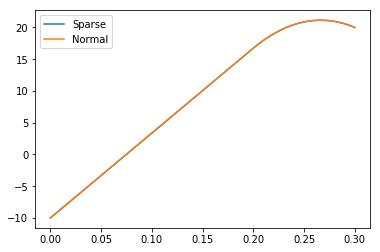

In [323]:
T_eq = spsolve(Asp, bsp)

# Affichage des résultats
plt.plot(x_grid,T_eq-273.15, label="Sparse")
plt.plot(x_grid,np.linalg.solve(A,b.transpose())-273.15,label="Normal")
plt.legend()

T_eq_Max=np.max(T_eq)
T_eq_Max-273.15

# Avec dépendance temporelle

In [279]:
# Paramètres supplémentaires
dt=dx**2*Cv*rho/k
alpha=Cv*rho/k
Xi=0.5

M=np.eye(len(x_grid))
M[0,0]=0
M[-1,-1]=0

# Nouvelle matrice A


# Ne pas oublier de recalculer les CF à chaque étape... 